Please enter the source IP in x.x.x.x format 192.168.30.189
Please enter the destination IP in x.x.x.x format 40.121.154.127


-------------------------------
Performance Metrics from Vectra
-------------------------------
            Source          Server  Network Delay  Server processing and Network Delivery Time                Server Delay
0   192.168.30.189  40.121.154.127          0.072                                        0.072                    0.000
1   192.168.30.189  40.121.154.127          0.070                                        0.071                    0.001
2   192.168.30.189  40.121.154.127          0.070                                        0.072                    0.002
3   192.168.30.189  40.121.154.127          0.071                                        0.071                    0.000
4   192.168.30.189  40.121.154.127          0.070                                        0.070                    0.000
5   192.168.30.189  40.121.154.127          0.071                                        0.069                    0.000
6   192.168.30.189  40.121.154.127          0.071            

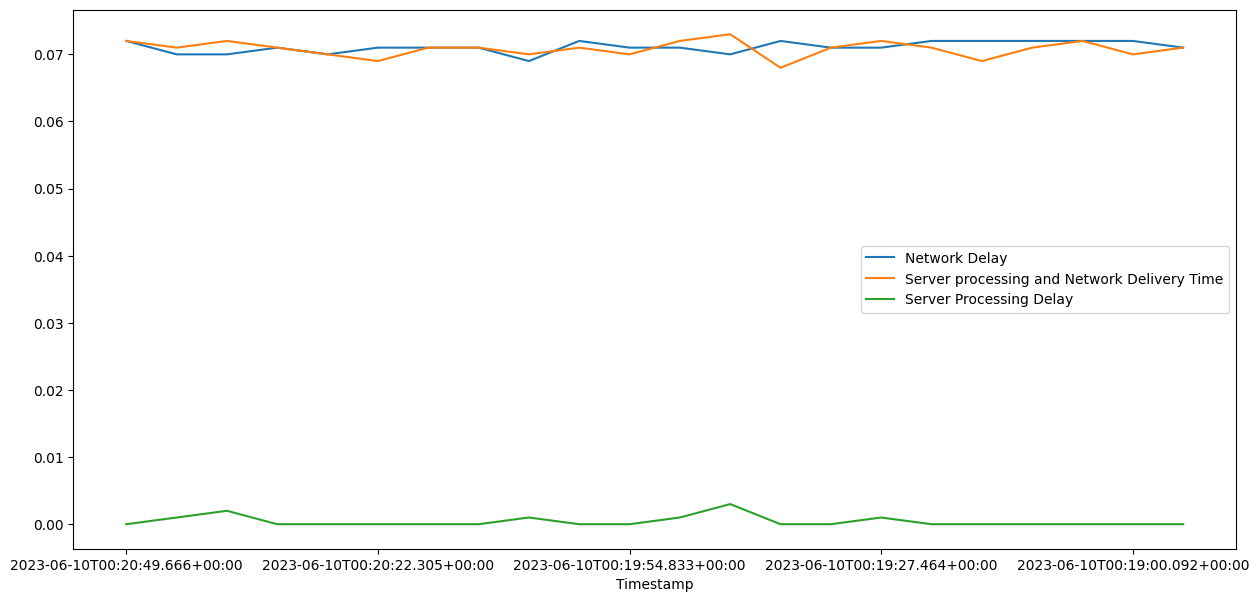

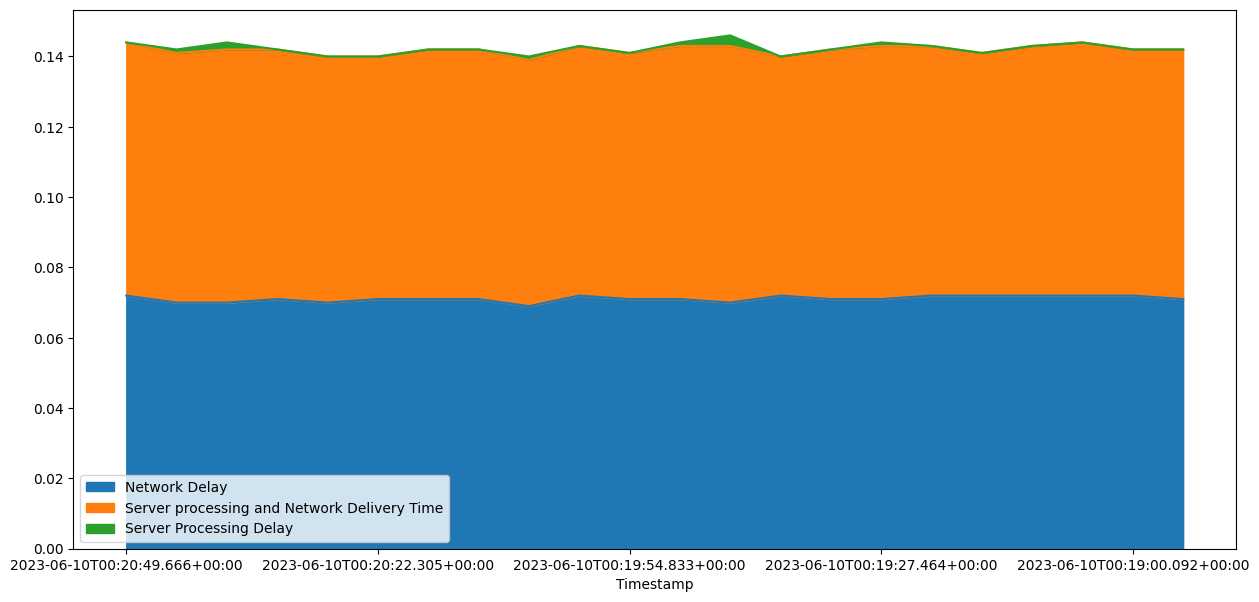

In [3]:
import pandas as pd
from datetime import datetime


df=pd.read_csv("Recall_Data.csv")
df = df.loc[df['protoName'] == "TCP"]
df_selected=df[["id.orig_h","orig_hostname","id.resp_h","resp_hostname","first_orig_resp_pkt_time","first_resp_orig_data_pkt_time","first_resp_orig_pkt_time","first_orig_resp_data_pkt_time","protoName"]]


source=input("Please enter the source IP in x.x.x.x format").strip()
destination=input("Please enter the destination IP in x.x.x.x format").strip()
#source="192.168.30.189"
#destination="40.121.154.127"

new_data=[]
new_data_graph=[]
for index,row in df_selected.iterrows():
    if (source==row["id.orig_h"] and destination==row["id.resp_h"]):
        #print(index)
        t0=row["first_orig_resp_pkt_time"].split("T0")
        t00=str(t0[1])
        t000=t00.split("+")
        t_orig_pkt_time=t000[0]
        t_orig_pkt_time=datetime.strptime(t_orig_pkt_time,"%H:%M:%S.%f")
        #print(t_orig_pkt_time)
        
        #t_orig_pkt_time=str(t_orig_pkt_time)
        
        t1=row["first_resp_orig_pkt_time"].split("T0")
        t11=str(t1[1])
        t111=t11.split("+")
        t_resp_pkt_time=t111[0]
        #t_resp_pkt_time=str(t_resp_pkt_time)
        t_resp_pkt_time=datetime.strptime(t_resp_pkt_time,"%H:%M:%S.%f")
        delta1=t_resp_pkt_time - t_orig_pkt_time
        delta1=delta1.total_seconds()
        #print(delta1)
        
        tt0=row["first_orig_resp_data_pkt_time"].split("T0")
        tt00=str(tt0[1])
        tt000=tt00.split("+")
        t_orig_data_pkt_time=tt000[0]
        t_orig_data_pkt_time=datetime.strptime(t_orig_data_pkt_time,"%H:%M:%S.%f")
        #print(t_orig_data_pkt_time)
        
        tt1=row["first_resp_orig_data_pkt_time"].split("T0")
        
        tt11=str(tt1[1])
        #print(tt11)
        tt111=tt11.split("+")
        t_resp_data_pkt_time=tt111[0]
        #print(t_resp_data_pkt_time)
        t_resp_data_pkt_time=datetime.strptime(t_resp_data_pkt_time,"%H:%M:%S.%f")
        #print(t_resp_data_pkt_time)

        delta2=t_resp_data_pkt_time - t_orig_data_pkt_time 
        #print(delta2)
        delta2=delta2.total_seconds()
        
        delta=delta2-delta1
        delta=float(delta)
        if delta < 0:
            delta=0;
        else:
            pass
        
        
        new_row = {"Source":row["id.orig_h"],"Server":row["id.resp_h"],"Network Delay":delta1,"Server processing and Network Delivery Time":delta2, "Server Processing Delay":delta}
        new_row_for_graph= {"Source":row["id.orig_h"],"Server":row["id.resp_h"],"Network Delay":delta1,"Server processing and Network Delivery Time":delta2, "Server Processing Delay":delta,"First Packet from Source":row["first_orig_resp_pkt_time"],"First Packet from Server":row["first_resp_orig_pkt_time"], "First Data Packet from Source":row["first_orig_resp_data_pkt_time"],"First Data Packet from Server":["first_resp_orig_data_pkt_time"],"Timestamp":row["first_orig_resp_pkt_time"]}

        new_data.append(new_row)
        new_data_graph.append(new_row_for_graph)
        #print("---")
print("-------------------------------")        
print("Performance Metrics from Vectra")
print("-------------------------------")
new_df=pd.DataFrame(new_data)
print(new_df)
print("-------------------------------")
new_df_graph=pd.DataFrame(new_data_graph)
#new_df_graph.plot(x="First Packet from Server",y="Network Delay", kind="line",ylabel='time', xlabel='timestamp',figsize = (15, 7))      
#new_df_graph.plot(x="First Packet from Server",y="Server Processing Delay", kind="line",ylabel='time', xlabel='timestamp',figsize = (15, 7)) 
new_df_graph.plot.line(x="Timestamp",figsize = (15, 7)) 
new_df_graph.plot.area(x="Timestamp",figsize = (15, 7)) 

pd.options.display.max_rows = 600 
pd.options.display.max_columns = 60000
pd.set_option('display.width',9000)
       
        
    